### 1. Importing packages

In [ ]:
!pip install pandas-datareader==0.10.0

In [ ]:
import datetime
import pandas_datareader as pdr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

import yfinance as yf

import random

import torch
import torch.nn as nn
from torch.autograd import Variable

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from scipy.optimize import minimize

### 2. Loading dataset

In [ ]:
tickers = yf.Tickers("aapl axp ba cat csco cvx dis gs hd ibm intc jnj jpm ko mcd mmm mrk msft nke pfe pg trv unh utx v vz wba wmt xom")

act_adj_close_df = pd.DataFrame()
list_of_stok = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']

for stok in list_of_stok:
    df = tickers.tickers["" + stok + ""].history(period='10y')
    act_adj_close_df["" + stok + ""] = df["Close"]

act_adj_close_df

ERROR:yfinance:UTX: No data found, symbol may be delisted


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-24 00:00:00-04:00,16.961678,78.619957,106.078506,73.547630,15.780527,75.987053,72.918282,136.997986,63.237545,117.854324,...,20.511724,59.551807,66.676262,69.735855,NaN,51.459087,28.858898,46.183010,20.743082,61.421066
2014-03-25 00:00:00-04:00,17.144129,78.473076,106.594177,74.868980,16.343857,76.800377,72.973328,134.956146,63.086720,122.105240,...,20.726675,59.934799,66.811432,69.581436,NaN,50.911278,28.987823,47.698265,20.772806,61.596302
2014-03-26 00:00:00-04:00,16.980230,77.453743,106.173035,74.269051,16.329222,77.207031,72.120209,133.699539,62.610405,120.590218,...,20.961172,59.701988,66.334366,69.958946,NaN,50.277206,28.858898,46.628250,20.599859,61.459995
2014-03-27 00:00:00-04:00,16.907249,77.738823,105.897987,74.762672,16.109741,77.180801,71.991791,134.162537,62.459572,118.843491,...,20.909063,59.814632,66.382080,69.512794,NaN,50.298199,29.276342,46.211731,20.575537,62.459473
2014-03-28 00:00:00-04:00,16.888380,78.144844,106.972359,75.476486,16.336535,77.725212,72.459610,134.170761,62.491329,119.231674,...,20.765759,59.897205,66.779610,70.027557,NaN,49.440346,29.110594,46.937046,20.540409,63.407009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,173.720001,220.970001,179.839996,351.899994,49.270000,155.410004,113.849998,384.369995,371.910004,191.690002,...,27.719999,161.210007,221.919998,487.049988,NaN,285.049988,39.930000,20.690001,60.860001,112.300003
2024-03-19 00:00:00-04:00,176.080002,221.690002,181.139999,353.899994,49.139999,156.619995,114.510002,388.660004,379.410004,193.339996,...,27.629999,161.830002,223.630005,493.320007,NaN,287.350006,39.970001,20.709999,60.869999,113.089996
2024-03-20 00:00:00-04:00,178.669998,227.910004,187.779999,356.450012,49.549999,154.550003,116.459999,396.470001,384.410004,193.960007,...,27.700001,161.990005,224.990005,494.230011,NaN,289.279999,40.119999,21.090000,61.250000,112.989998


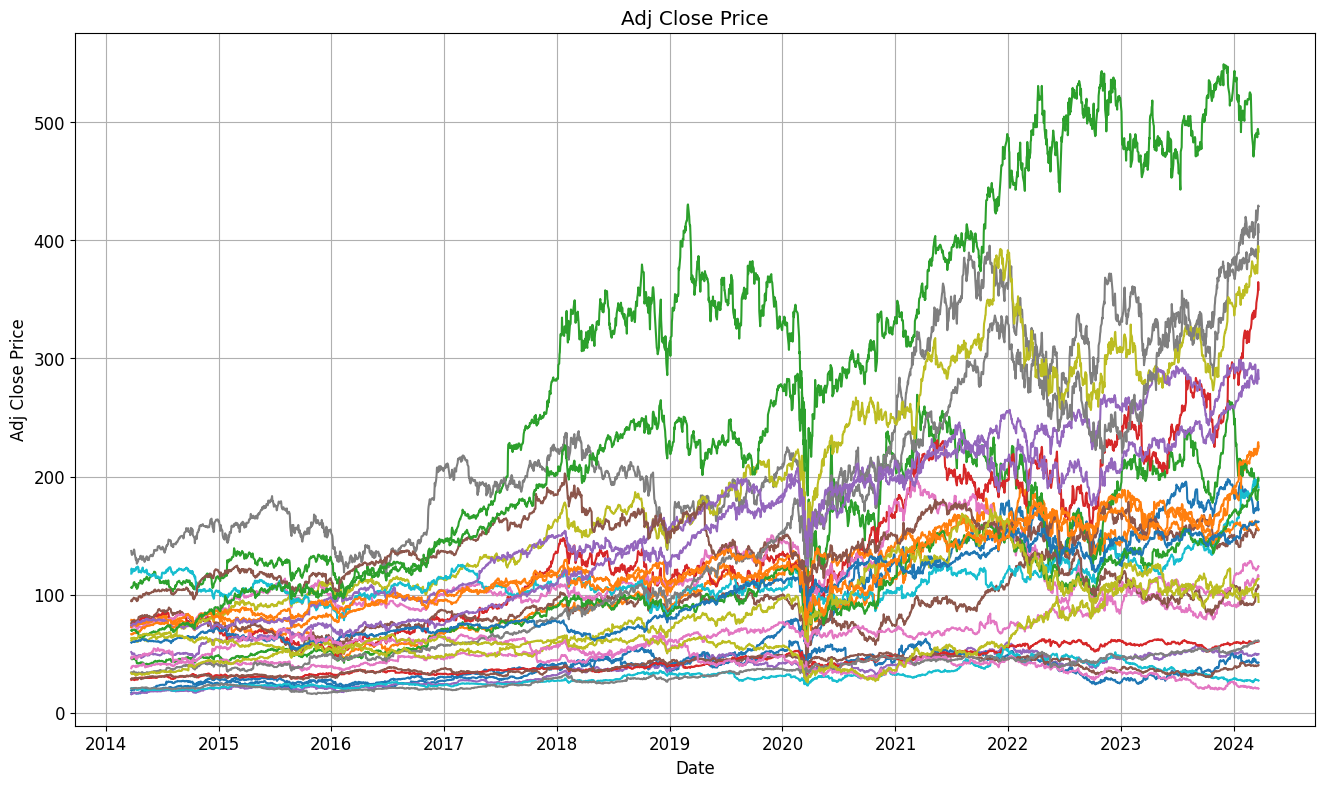

In [ ]:
plt.plot(act_adj_close_df.index, act_adj_close_df)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price')
plt.show()

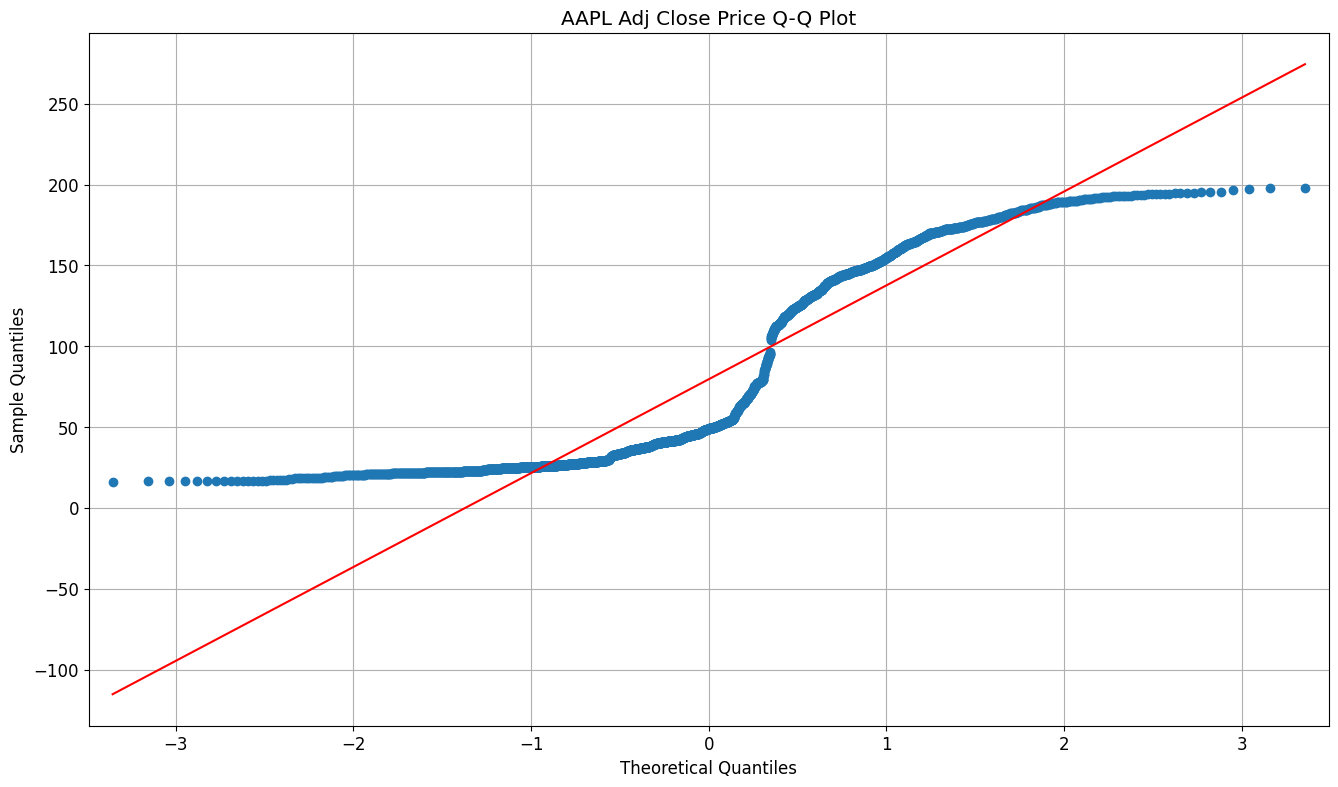

In [ ]:
# q-q plot
qqplot(act_adj_close_df['AAPL'], line='s')
plt.title('AAPL Adj Close Price Q-Q Plot')
plt.show()

In [ ]:
act_adj_close_df.to_csv('act-adj-close-df.csv')

### 3. Building LSTM model

In [ ]:
device = torch.device('cuda')

In [ ]:
class LSTM_model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_model, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.num_layers, x.size(0),
                                  self.hidden_size)).to(device)
        c0 = Variable(torch.zeros(self.num_layers, x.size(0),
                                  self.hidden_size)).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
def build_model(input_size=1, hidden_size=1, num_layers=1, num_classes=1, learning_rate=0.001):

    model = LSTM_model(input_size, hidden_size, num_layers, num_classes).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    loss_function = torch.nn.MSELoss()
    # model.load_state_dict(torch.load(f'{ticker}-model-state.pth'))
    # model.train()
    # model.eval()

    return model, optimizer, loss_function

### 4. Model fitting and evaluation

In [ ]:
time_step = 100

In [ ]:
def create_xy(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
model_loss_df = pd.DataFrame(index=[epoch for epoch in range(0, 11000, 1000)], columns=list_of_stok)
pred_adj_close_df = pd.DataFrame(index=df.index[time_step + 1:], columns=list_of_stok)
model_perf_df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'MPE'], columns=list_of_stok)

In [ ]:
def MAE(y_true, y_hat):
    return np.mean(np.abs(y_true - y_hat))

def MSE(y_true, y_hat):
    return np.mean(np.square(y_true - y_hat))

def RMSE(y_true, y_hat):
    return np.sqrt(MSE(y_true, y_hat))

def MAPE(y_true, y_hat):
    return np.mean(np.abs((y_true - y_hat) / y_true)) * 100

def MPE(y_true, y_hat):
    return np.mean((y_true - y_hat) / y_true) * 100

In [ ]:
def fit_model(ticker, X_train, y_train):
    model, optimizer, loss_function = build_model(ticker)
    num_epochs = 10000

    loss_list = []

    for epoch in range(num_epochs + 1):
        outputs = model.forward(X_train.to(device))
        optimizer.zero_grad()
        loss = loss_function(outputs, y_train.to(device))
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            loss_list.append(loss.item())

    model_loss_df[ticker] = loss_list

    torch.save(model.state_dict(), f'{ticker}-model-state.pth')

    return model

In [ ]:
all_split = 2518

In [ ]:
for ticker in list_of_stok:
    scaler = MinMaxScaler()
    norm_act_adj_close = scaler.fit_transform(np.array(act_adj_close_df[ticker]).reshape(-1, 1))

    train_set, val_set = norm_act_adj_close[:all_split], norm_act_adj_close[all_split:]

    X_train, y_train = create_xy(train_set, time_step)
    X_val, y_val = create_xy(norm_act_adj_close, time_step)

    X_train_tensors = Variable(torch.Tensor(X_train))
    y_train_tensors = Variable(torch.Tensor(y_train))

    X_val_tensors = Variable(torch.Tensor(X_val))
    y_true = scaler.inverse_transform(y_val)

    print(f'{ticker}')
    model = fit_model(ticker=ticker, X_train=X_train_tensors, y_train=y_train_tensors)

    y_hat = model(X_val_tensors.to(device))
    y_hat = y_hat.data.detach().cpu().numpy()
    y_hat = scaler.inverse_transform(y_hat)


    pred_adj_close_df[ticker] = y_hat

    model_perf_df[ticker] = [MAE(y_true, y_hat), MSE(y_true, y_hat), RMSE(y_true, y_hat),
                             MAPE(y_true, y_hat), MPE(y_true, y_hat)]

AAPL


TypeError: empty(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got str"

In [ ]:
pred_adj_close_df

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-15 00:00:00-04:00,145.470261,4.789683,295.286743,-30.038830,32.760937,114.855339,208.690964,188.965988,85.179733,86.323196,...,23.936245,173.778900,-56.841606,288.219666,NaN,-93.907593,25.963713,-19.776396,-13.719649,46.880272
2014-08-18 00:00:00-04:00,145.464966,4.788516,295.360565,-30.056440,32.728600,114.867653,208.708984,188.946472,85.235573,86.323120,...,23.924232,173.811310,-56.829739,288.319397,NaN,-93.902977,25.965303,-19.771906,-13.718135,46.884235
2014-08-19 00:00:00-04:00,145.460464,4.791318,295.308441,-30.063644,32.726025,114.868134,208.733231,188.951569,85.254715,86.322823,...,23.920959,173.797577,-56.825436,288.353516,NaN,-93.909096,25.965033,-19.758291,-13.720221,46.886330
2014-08-20 00:00:00-04:00,145.455139,4.791813,295.379608,-30.099392,32.736210,114.862495,208.756332,188.892349,85.255264,86.324051,...,23.914976,173.843475,-56.813416,288.456604,NaN,-93.897438,25.963497,-19.764328,-13.717716,46.861679
2014-08-21 00:00:00-04:00,145.447540,4.786260,295.389404,-30.115389,32.735874,114.821228,208.773163,188.862854,85.517441,86.324379,...,23.910093,173.860428,-56.808472,288.629730,NaN,-93.892494,25.961971,-19.775652,-13.715989,46.866177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,129.960632,2.795234,296.293365,-51.216942,34.659046,109.606773,209.575378,178.892639,97.735435,86.401085,...,23.356989,168.480057,-50.055882,380.632477,NaN,-87.480453,26.407995,-19.725466,-13.099923,44.730194
2024-03-19 00:00:00-04:00,129.934875,2.817100,296.453033,-51.505455,34.602753,109.564804,209.571411,178.897766,97.780533,86.397812,...,23.361368,168.508560,-50.052097,380.755798,NaN,-87.518600,26.400631,-19.734648,-13.101358,44.784691
2024-03-20 00:00:00-04:00,129.837997,2.809281,296.416840,-51.836075,34.632240,109.548599,209.567307,178.907135,97.814354,86.399025,...,23.370476,168.549500,-50.038639,380.754517,NaN,-87.497986,26.394945,-19.739304,-13.100459,44.747292


In [ ]:
model_perf_df

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
MAE,75.515266,104.933145,121.652977,173.406724,9.998892,34.548739,95.773297,67.856469,105.872065,25.616904,...,8.274950,73.414821,179.153037,122.308573,NaN,242.279705,12.831688,67.151119,47.534891,20.391431
MSE,7464.014243,12737.552137,16737.984587,35204.524851,123.687627,1402.736411,9906.728242,8751.197675,17992.563128,950.421569,...,127.637453,6518.053865,33074.633342,17867.017508,NaN,62718.793462,201.327375,4688.979835,2394.564254,762.106747
RMSE,86.394527,112.860764,129.375363,187.628689,11.121494,37.453123,99.532549,93.547836,134.136360,30.828908,...,11.297675,80.734465,181.864327,133.667563,NaN,250.437205,14.188988,68.476126,48.934285,27.606281
MAPE,207.432674,95.247400,72.666280,128.995868,29.753925,39.358026,93.194429,25.436719,43.581452,21.388007,...,22.965240,92.858902,147.396568,74.727540,NaN,177.588431,31.066657,146.446434,145.304770,28.235648
MPE,-197.358926,95.247400,-57.494218,128.995868,-2.183588,-26.874224,-93.194429,10.709172,42.394531,21.186206,...,19.611272,-92.858902,147.396568,-62.757930,NaN,177.588431,31.066657,146.446434,145.304770,19.666450
